# 과제3: 정규분포 난수로 히스토그램 만들기 (팬시 인덱싱과 브로드캐스팅 활용)
목표: 난수를 생성하고, 직접 구간에 속하는 인덱스를 계산하여 히스토그램을 생성. np.searchsorted를 사용하지 않고 각 값이 어느 구간에 속하는지 확인.

## 구현 순서:

1. 난수 생성:

평균이 0, 표준편차가 1인 정규분포에서 난수 10,000개를 생성하여 data 배열에 저장.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
data = np.random.randn(10000)
data

array([ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.70531672,
        0.49576557,  0.64438845])

2. 구간 설정:

-10에서 10까지 20개의 구간을 균등하게 나누어 bins 배열.
이 구간들은 히스토그램의 각 구간 경계.



In [44]:
bins = np.linspace(-10, 10, 21)

3. 구간 인덱스 계산:

data의 각 값이 어느 구간에 속하는지 직접 계산하여 구간 인덱스 배열 indices에 저장.
예를 들어, data의 값이 특정 구간에 속하면 indices 배열에 그 구간 인덱스를 기록합니다.
이 과정에서 브로드캐스팅과 팬시 인덱싱을 활용하여 효율적으로 구간 인덱스를 계산.



In [37]:
i = np.searchsorted(bins, data)
i

array([10, 10, 11, ...,  9, 10, 11])

In [ ]:
mask = (range[:,[0]])

4. 누적 카운팅:

구한 indices 값을 사용하여, 각 구간별로 카운트를 계산.
팬시 인덱싱을 통해 indices에 해당하는 counts 위치에 1씩 누적.



In [ ]:
counts = np.sum(mask, axis=1)

In [41]:
counts = np.zeros_like(bins)
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [42]:
np.add.at(counts, i, 1)

5. 결과 시각화:

구간별 빈도수를 그래프로 시각화하여 히스토그램.
bins와 counts를 사용하여 히스토그램이 올바르게 그려졌는지 확인.

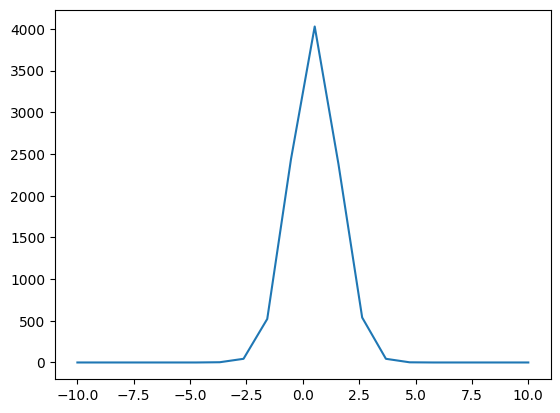

In [ ]:
plt.plot(bins, counts)
#plt.hist(counts)
#plt.bar()